# Лабораторная работа 5

Градиентный бустинг с Catboost

Выполнил: 6133-010402D, Харитонов Никита Владимирович

Туториал по использованию библиотеки CatBoost: https://github.com/catboost/tutorials/blob/master/ru/ml_session_2018_tutorial_ru.ipynb

Мастер-класс от Яндекса по CatBoost классификации: https://www.youtube.com/watch?v=xl1fwCza9C8

Установка билиотек:

`pip3 install catboost shap ipywidgets
jupyter nbextension enable --py widgetsnbextension`

In [1]:
!pip install catboost shap ipywidgets 
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [2]:
!pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import auc, plot_precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error
import catboost
from catboost import CatBoostClassifier, Pool, CatBoostRegressor
from catboost.utils import get_roc_curve
import warnings

In [4]:
warnings.filterwarnings('ignore')

0 Подобрать набор данных для классификации (количество классов не имеет значения) и регрессии. Важно наличие числовых и категориальных признаков в данных. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. Можно работать на тех же данных, что и в предыдущей Л.Р.: в этом случае сравнить с результатами лучшего классификатора из предыдущей работы.

In [5]:
data = load_penguins()
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [6]:
# print unique values of categorical columns
for col in ['species', 'island', 'sex', 'year']:
  print(f'{col} = {data[col].unique()}')

species = ['Adelie' 'Gentoo' 'Chinstrap']
island = ['Torgersen' 'Biscoe' 'Dream']
sex = ['male' 'female' nan]
year = [2007 2008 2009]


In [7]:
# вещественные колонки:
# - bill_length_mm        длина клюва пингвина в мм
# - bill_depth_mm         высота клюва пингвина в мм
# - flipper_length_mm     длина плавника пингвина в мм
# - body_mass_g           масса тела пингвина в граммах

# целочисленные колонки:
# - year                  год проведения исследования: 2007, 2008 и 2009

# категориальные колонки:
# - species               биологический вид пингвина: пингвин Адели, cубантарктический пингвин и антарктический пингвин
# - island                остров, на котором пингвин был исследован: Торгерсен, Биско и Дрим
# - sex                   пол пингвина: муж, жен и неопределённый

In [8]:
# delete rows with nan
data.dropna(inplace=True)

# leave only two classes
data = data.drop(data[data['species'] == 'Chinstrap'].index)

# split data into features (X) and targets (y)
X = data.drop('species', axis=1)
y = data['species']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1  Применить классификатор `CatBoostClassifier` к вашему набору данных. Обратите внимание, что catboost умеет работать с категориальными признаками (параметр `cat_features` - список индексов категориальных признаков), поэтому использование `pd.factorize / pd.get_dummies` здесь лишнее.    
- Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss.
- Вывести значения метрик качества классификации на тестовых данных (accuracy и precision / recall / AUC, если применимо).
- В случае бинарной классификации на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.


Примеры классификатора и построения ROC-кривой: https://github.com/catboost/tutorials/blob/master/classification/classification_tutorial.ipynb

In [9]:
cat_features = list([0,5,6]) 

model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    loss_function='Logloss', 
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose = False
    
)

Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss.

In [10]:
print('best iteration:', model.get_best_iteration())
print('best score:', model.best_score_)

best iteration: 99
best score: {'learn': {'Logloss': 0.01842233584456716}, 'validation': {'Logloss': 0.026867636741040018}}


Вывести значения метрик качества классификации на тестовых данных (accuracy и precision / recall / AUC, если применимо).

In [11]:
print(classification_report( 
    model.predict(X_test), y_test, target_names=['Torgersen', 'Biscoe']
))

              precision    recall  f1-score   support

   Torgersen       1.00      1.00      1.00        33
      Biscoe       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



В случае бинарной классификации на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.

ROC-AUC: 1.0


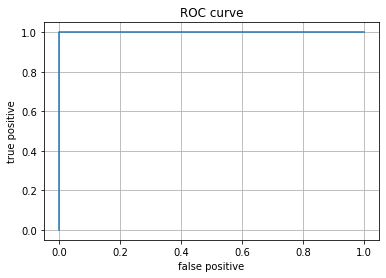

In [12]:
eval_pool = Pool(X_test, y_test, cat_features=cat_features) 
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = auc(fpr, tpr)

print('ROC-AUC: ' + str(roc_auc))

plt.plot(fpr, tpr)
plt.grid(True)
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('ROC curve')
plt.show()

RPC-AUC: 1.0


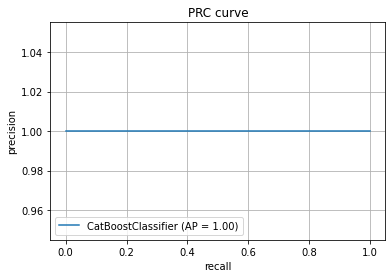

In [13]:
s = average_precision_score(pd.factorize(y_test)[0], model.predict_proba(X_test)[:,0]) 
print('RPC-AUC: ' + str(s))

plot_precision_recall_curve(model, X_test, y_test)
plt.grid(True)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

2 Применить регрессию `CatBoostRegressor` к набору данных для регрессии. Вывести номер итерации и значения метрик (MAE и MSE) для наилучшей итерации. Обратите внимание, что в задаче восстановления регрессии целевая переменная имеет непрерывные значения. 

In [14]:
col = list(['island',  'sex'])

for num in col: 
    data[num] = pd.factorize(data[num])[0]

y_r = data['species']
y_r = y_r.replace({'Adelie': 0, 'Gentoo': 1})
X_r = data.drop('species', axis=1)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_r, y_r, random_state = 0
)

MSE

In [15]:
model_r = CatBoostRegressor(iterations=500, learning_rate=0.1, use_best_model=True, loss_function = 'RMSE') 
model_r.fit(X_train_r, y_train_r, verbose=False, eval_set=(X_test_r, y_test_r))
print('best iteration:', model_r.get_best_iteration())
print('MSE: ' + str(mean_squared_error(y_test_r, model_r.predict(data=X_test_r))))

best iteration: 375
MSE: 0.001429356243023749


MAE

In [16]:
model_r = CatBoostRegressor(iterations=500, learning_rate=0.1, use_best_model=True, loss_function = 'MAE') 
model_r.fit(X_train_r, y_train_r, verbose=False, eval_set=(X_test_r, y_test_r))
print('best iteration:', model_r.get_best_iteration())
print('MAE: ' + str(mean_absolute_error(y_test_r, model_r.predict(data=X_test_r))))

best iteration: 475
MAE: 0.01634694686921767
